
# Iris Dataset Analysis


## a) Load Iris data from CSV and print 

In [6]:
import pandas as pd
import numpy as np

iris_df = pd.read_csv('iris.csv')
print("Data shape:", iris_df.shape)
print("Data types:\n", iris_df.dtypes)
print("First three rows:\n", iris_df.head(3))

Data shape: (150, 5)
Data types:
 sepal.length    float64
sepal.width     float64
petal.length    float64
petal.width     float64
variety          object
dtype: object
First three rows:
    sepal.length  sepal.width  petal.length  petal.width variety
0           5.1          3.5           1.4          0.2  Setosa
1           4.9          3.0           1.4          0.2  Setosa
2           4.7          3.2           1.3          0.2  Setosa


## b) Print Iris data using scikit-learn 

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

print("Dataset keys:", iris.keys())
print("Shape of data:", iris.data.shape)
print("Feature names:", iris.target_names)
print("Description:\n", iris.DESCR)

Dataset keys: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
Shape of data: (150, 4)
Feature names: ['setosa' 'versicolor' 'virginica']
Description:
 .. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (

## c) Display basic statistics 

In [3]:
print(iris_df.describe())

       sepal.length  sepal.width  petal.length  petal.width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


## d) Count observations of each species

In [4]:
print(iris_df['variety'].value_counts())

variety
Setosa        50
Versicolor    50
Virginica     50
Name: count, dtype: int64


## e) Plot overall statistics of the Iris dataset

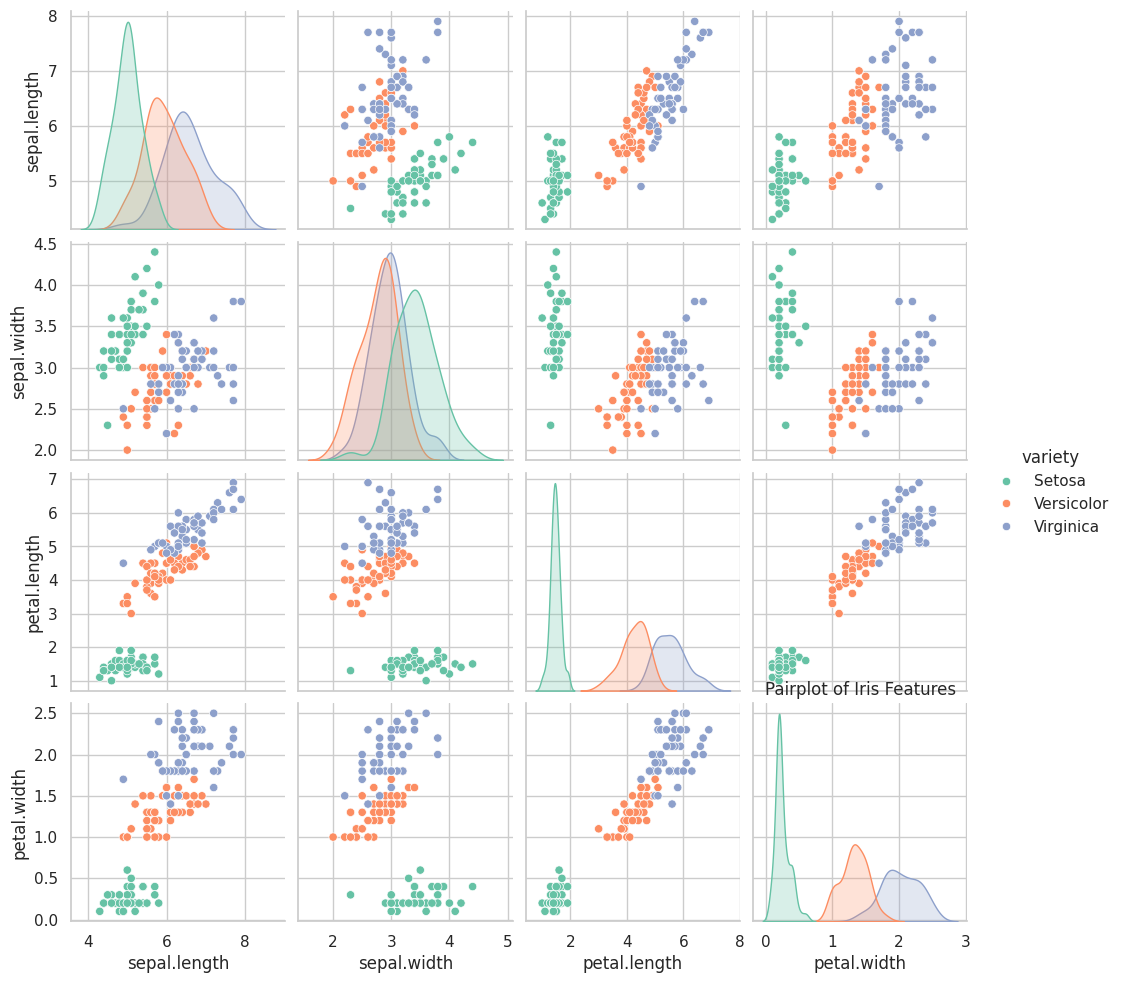

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
pairplot = sns.pairplot(iris_df, hue='variety', palette='Set2')
plt.title('Pairplot of Iris Features')
plt.show()

## f) Create bar chart for species frequency

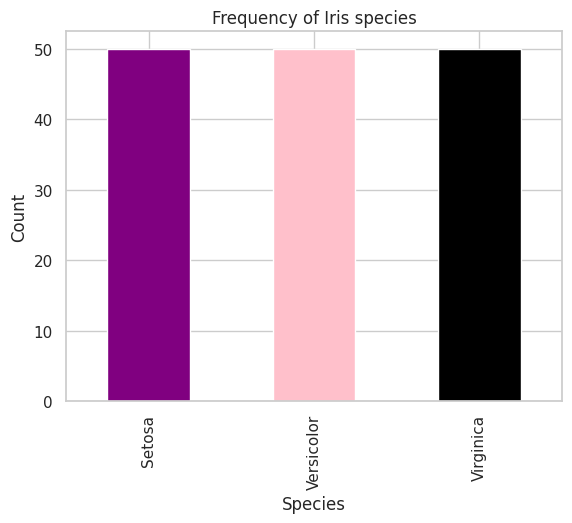

In [8]:
iris_df['variety'].value_counts().plot(kind='bar', color=['purple', 'pink', 'black'])
plt.title('Frequency of Iris species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

## g) Split data into attributes (X) and labels (y)

In [9]:
X = iris_df.iloc[:, :-1]
y = iris_df.iloc[:, -1]

print("Attributes X:\n", X)
print("Labels y:\n", y)

Attributes X:
      sepal.length  sepal.width  petal.length  petal.width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]
Labels y:
 0         Setosa
1         Setosa
2         Setosa
3         Setosa
4         Setosa
         ...    
145    Virginica
146    Virginica
147    Virginica
148    Virginica
149    Virginica
Name: variety, Length: 150, dtype: object


## h) Split dataset into training (70%) and test (30%) sets

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training set (X):")
print(X_train)

print("\nTest set (X):")
print(X_test)

print("\nTraining set (y):")
print(y_train)

print("\nTest set (y):")
print(y_test)

Training set (X):
     sepal.length  sepal.width  petal.length  petal.width
81            5.5          2.4           3.7          1.0
133           6.3          2.8           5.1          1.5
137           6.4          3.1           5.5          1.8
75            6.6          3.0           4.4          1.4
109           7.2          3.6           6.1          2.5
..            ...          ...           ...          ...
71            6.1          2.8           4.0          1.3
106           4.9          2.5           4.5          1.7
14            5.8          4.0           1.2          0.2
92            5.8          2.6           4.0          1.2
102           7.1          3.0           5.9          2.1

[105 rows x 4 columns]

Test set (X):
     sepal.length  sepal.width  petal.length  petal.width
73            6.1          2.8           4.7          1.2
18            5.7          3.8           1.7          0.3
118           7.7          2.6           6.9          2.3
78            6

## i) Convert species into numerical values

In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
iris_df['variety'] = le.fit_transform(iris_df['variety'])
iris_df
X = iris_df.iloc[:, :-1]
y = iris_df['variety']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set (X):")
print(X_train)

print("\nTest set (X):")
print(X_test)

print("\nTraining set (y):")
print(y_train)

print("\nTest set (y):")
print(y_test)

Training set (X):
     sepal.length  sepal.width  petal.length  petal.width
22            4.6          3.6           1.0          0.2
15            5.7          4.4           1.5          0.4
65            6.7          3.1           4.4          1.4
11            4.8          3.4           1.6          0.2
42            4.4          3.2           1.3          0.2
..            ...          ...           ...          ...
71            6.1          2.8           4.0          1.3
106           4.9          2.5           4.5          1.7
14            5.8          4.0           1.2          0.2
92            5.8          2.6           4.0          1.2
102           7.1          3.0           5.9          2.1

[120 rows x 4 columns]

Test set (X):
     sepal.length  sepal.width  petal.length  petal.width
73            6.1          2.8           4.7          1.2
18            5.7          3.8           1.7          0.3
118           7.7          2.6           6.9          2.3
78            6

## j) Predict using K-Nearest Neighbors (5 neighbors)

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print("Predictions for the test set:")
print(y_pred)

accuracy = accuracy_score(y_test, y_pred)
print("\nActual labels for the test set:")
print(y_test.values)

print(f"\nModel Accuracy: {accuracy * 100:.2f}%")

Predictions for the test set:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]

Actual labels for the test set:
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]

Model Accuracy: 100.00%
